In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR

module_path = os.path.abspath(os.path.join('../../py-conjugated/'))
if module_path not in sys.path:
    sys.path.append(module_path)
import network_utils as nuts
import physically_informed_loss_functions as pilf

In [2]:
dev_train_df = pd.read_excel('/Users/wesleytatum/Desktop/py-conjugated/data/normed_OPV_device.xlsx')
train_df = pd.read_excel('/Users/wesleytatum/Desktop/py-conjugated/data/normed_OPV_train.xlsx')
test_df = pd.read_excel('/Users/wesleytatum/Desktop/py-conjugated/data/normed_OPV_test.xlsx')

dev_only_x = dev_train_df[['Time (min)', 'Temp (C)']]
dev_only_y = dev_train_df[['PCE', 'VocL', 'Jsc', 'FF']]
x_train = train_df[['Anneal_time', 'Anneal_temp',
                   'p1_fraction', 'p2_fraction', 'p3_fraction',
                   'p1_area_avg', 'p1_area_stdev', 'p1_filled_area_avg',
                   'p1_filled_area_stdev', 'p1_extent_avg', 'p1_extent_stdev',
                   'p1_MajorAL_avg', 'p1_MajorAL_stdev', 'p1_MinorAL_avg',
                   'p1_MinorAL_stdev', 'p1_Ecc_avg', 'p1_Ecc_stdev','p1_Orient_avg',
                   'p1_Orient_stdev', 'p1_Perim_avg', 'p1_Perim_stdev',

                   'p2_area_avg', 'p2_area_stdev', 'p2_filled_area_avg',
                   'p2_filled_area_stdev', 'p2_extent_avg', 'p2_extent_stdev',
                   'p2_MajorAL_avg', 'p2_MajorAL_stdev', 'p2_MinorAL_avg',
                   'p2_MinorAL_stdev', 'p2_Ecc_avg', 'p2_Ecc_stdev','p2_Orient_avg',
                   'p2_Orient_stdev', 'p2_Perim_avg', 'p2_Perim_stdev',

                   'p3_area_avg', 'p3_area_stdev', 'p3_filled_area_avg',
                   'p3_filled_area_stdev', 'p3_extent_avg', 'p3_extent_stdev',
                   'p3_MajorAL_avg', 'p3_MajorAL_stdev', 'p3_MinorAL_avg',
                   'p3_MinorAL_stdev', 'p3_Ecc_avg', 'p3_Ecc_stdev','p3_Orient_avg',
                   'p3_Orient_stdev', 'p3_Perim_avg', 'p3_Perim_stdev']]
y_train = train_df[['PCE', 'VocL', 'Jsc', 'FF']]

x_test = test_df[['Anneal_time', 'Anneal_temp',
                   'p1_fraction', 'p2_fraction', 'p3_fraction',
                   'p1_area_avg', 'p1_area_stdev', 'p1_filled_area_avg',
                   'p1_filled_area_stdev', 'p1_extent_avg', 'p1_extent_stdev',
                   'p1_MajorAL_avg', 'p1_MajorAL_stdev', 'p1_MinorAL_avg',
                   'p1_MinorAL_stdev', 'p1_Ecc_avg', 'p1_Ecc_stdev','p1_Orient_avg',
                   'p1_Orient_stdev', 'p1_Perim_avg', 'p1_Perim_stdev',

                   'p2_area_avg', 'p2_area_stdev', 'p2_filled_area_avg',
                   'p2_filled_area_stdev', 'p2_extent_avg', 'p2_extent_stdev',
                   'p2_MajorAL_avg', 'p2_MajorAL_stdev', 'p2_MinorAL_avg',
                   'p2_MinorAL_stdev', 'p2_Ecc_avg', 'p2_Ecc_stdev','p2_Orient_avg',
                   'p2_Orient_stdev', 'p2_Perim_avg', 'p2_Perim_stdev',

                   'p3_area_avg', 'p3_area_stdev', 'p3_filled_area_avg',
                   'p3_filled_area_stdev', 'p3_extent_avg', 'p3_extent_stdev',
                   'p3_MajorAL_avg', 'p3_MajorAL_stdev', 'p3_MinorAL_avg',
                   'p3_MinorAL_stdev', 'p3_Ecc_avg', 'p3_Ecc_stdev','p3_Orient_avg',
                   'p3_Orient_stdev', 'p3_Perim_avg', 'p3_Perim_stdev']]
y_test = test_df[['PCE', 'VocL', 'Jsc', 'FF']]

In [3]:
params = {
    'kernel' : ['linear', 'poly', 'rbf'],
    'coef0' : np.linspace(1e-2, 10, num = 30),
    'degree' : np.arange(2, 34, step = 2),
    'gamma' : ['scale'],
    'C': [1e-1, 1e0, 1e1, 1e2, 1e3],
    'tol' : [1e-3],
    'cache_size' : [500],
    'verbose' : [True]
}

svr_pce = GridSearchCV(SVR(), param_grid = params, verbose = 3, n_jobs = -1)
svr_voc = GridSearchCV(SVR(), param_grid = params, verbose = 3, n_jobs = -1)
svr_jsc = GridSearchCV(SVR(), param_grid = params, verbose = 3, n_jobs = -1)
svr_ff = GridSearchCV(SVR(), param_grid = params, verbose = 3, n_jobs = -1)

In [4]:
svr_pce.fit(x_train, y_train['PCE'])
svr_voc.fit(x_train, y_train['VocL'])
svr_jsc.fit(x_train, y_train['Jsc'])
svr_ff.fit(x_train, y_train['FF'])

Fitting 5 folds for each of 7200 candidates, totalling 36000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 2064 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done 8944 tasks      | elapsed:   39.7s
[Parallel(n_jobs=-1)]: Done 10672 tasks      | elapsed:   59.2s
[Parallel(n_jobs=-1)]: Done 12784 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 15280 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 18160 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 21424 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 24128 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 26816 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 29760 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 32960 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 36000 out of 36000 | elapsed:  9.5min finished


[LibSVM]Fitting 5 folds for each of 7200 candidates, totalling 36000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 2136 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 7256 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done 12240 tasks      | elapsed:   47.3s
[Parallel(n_jobs=-1)]: Done 13968 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 16080 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 18576 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 21456 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 24720 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 28368 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 32400 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 36000 out of 36000 | elapsed:  3.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[LibSVM]Fitting 5 folds for each of 7200 candidates, totalling 36000 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 1528 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 4088 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 7672 tasks      | elapsed:   32.4s
[Parallel(n_jobs=-1)]: Done 10160 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 12976 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 16304 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 19164 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 21340 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 23772 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 26460 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 29404 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 32604 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 36000 out of 36000 | elapsed:  8.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[LibSVM]Fitting 5 folds for each of 7200 candidates, totalling 36000 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1528 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 4088 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 7672 tasks      | elapsed:   25.0s
[Parallel(n_jobs=-1)]: Done 12280 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 15112 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 15944 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 16904 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 20912 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 25776 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 31152 tasks      | elapsed:  6.6min


[LibSVM]

[Parallel(n_jobs=-1)]: Done 36000 out of 36000 | elapsed:  8.1min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 1.0, 10.0, 100.0, 1000.0],
                         'cache_size': [500],
                         'coef0': array([ 0.01      ,  0.35448276,  0.69896552,  1.04344828,  1.38793103,
        1.73241379,  2.0...
        5.17724138,  5.52172414,  5.8662069 ,  6.21068966,  6.55517241,
        6.89965517,  7.24413793,  7.58862069,  7.93310345,  8.27758621,
        8.62206897,  8.96655172,  9.31103448,  9.65551724, 10.        ]),
                         'degree': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32]),
                         'gamma': ['scale'],
                         'kernel': ['linear', 'poly', '

In [5]:
pce_params = svr_pce.best_params_
voc_params = svr_voc.best_params_
jsc_params = svr_jsc.best_params_
ff_params = svr_ff.best_params_

print(pce_params)
print(voc_params)
print(jsc_params)
print(ff_params)

{'C': 1000.0, 'cache_size': 500, 'coef0': 0.6989655172413793, 'degree': 8, 'gamma': 'scale', 'kernel': 'poly', 'tol': 0.001, 'verbose': True}
{'C': 0.1, 'cache_size': 500, 'coef0': 0.01, 'degree': 12, 'gamma': 'scale', 'kernel': 'poly', 'tol': 0.001, 'verbose': True}
{'C': 100.0, 'cache_size': 500, 'coef0': 0.3544827586206897, 'degree': 6, 'gamma': 'scale', 'kernel': 'poly', 'tol': 0.001, 'verbose': True}
{'C': 1000.0, 'cache_size': 500, 'coef0': 0.3544827586206897, 'degree': 8, 'gamma': 'scale', 'kernel': 'poly', 'tol': 0.001, 'verbose': True}


In [6]:
pce_preds = svr_pce.predict(x_test)
voc_preds = svr_voc.predict(x_test)
jsc_preds = svr_jsc.predict(x_test)
ff_preds = svr_ff.predict(x_test)

In [7]:
mape = pilf.reg_MAPE()

pce_mse = mean_squared_error(pce_preds, y_test['PCE'])
pce_r2 = r2_score(pce_preds, y_test['PCE'])
pce_mape = mape.forward(pce_preds, y_test['PCE'])

print(f'mse = {pce_mse}, mape = {pce_mape}, r2 = {pce_r2}')

voc_mse = mean_squared_error(voc_preds, y_test['VocL'])
voc_r2 = r2_score(voc_preds, y_test['VocL'])
voc_mape = mape.forward(voc_preds, y_test['VocL'])

print(f'mse = {voc_mse}, mape = {voc_mape}, r2 = {voc_r2}')

jsc_mse = mean_squared_error(jsc_preds, y_test['Jsc'])
jsc_r2 = r2_score(jsc_preds, y_test['Jsc'])
jsc_mape = mape.forward(jsc_preds, y_test['Jsc'])

print(f'mse = {jsc_mse}, mape = {jsc_mape}, r2 = {jsc_r2}')

ff_mse = mean_squared_error(ff_preds, y_test['FF'])
ff_r2 = r2_score(ff_preds, y_test['FF'])
ff_mape = mape.forward(ff_preds, y_test['FF'])

print(f'mse = {ff_mse}, mape = {ff_mape}, r2 = {ff_r2}')

mse = 0.04477020943389915, mape = 22.596056265894145, r2 = -0.7529223646856558
mse = 0.0057241587390264225, mape = 6.496027574096772, r2 = -0.8465643264677043
mse = 0.017489552750879274, mape = 13.366397257973697, r2 = -0.04497373342045985
mse = 0.04062925997527683, mape = 19.713255595742847, r2 = -0.7437178798950286


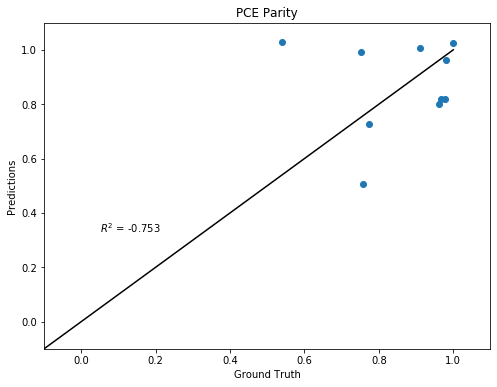

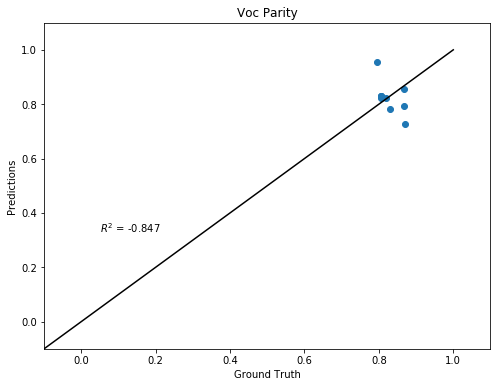

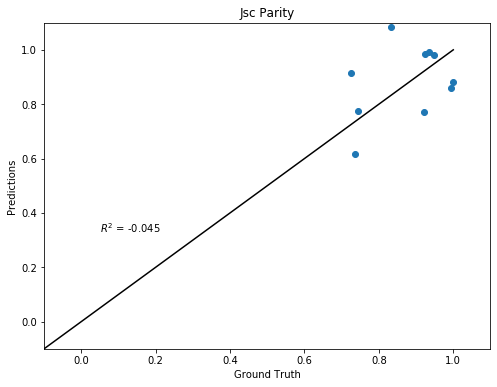

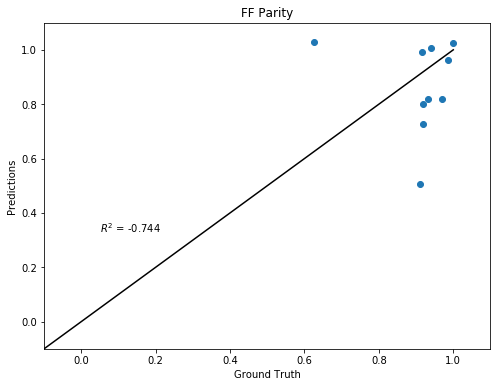

In [8]:
xlin = ylin = np.arange(-2, 2, 1)

r2 = r2_score(pce_preds, y_test['PCE'])
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(y_test['PCE'], pce_preds)
plt.plot(xlin, ylin, c = 'k')
ax.annotate(f"$R^{2}$ = {r2:.3f}", xy = (0.2, 0.4), xycoords = 'figure fraction')
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
ax.set_ylabel("Predictions")
ax.set_xlabel("Ground Truth")
plt.title('PCE Parity')
plt.show()

r2 = r2_score(voc_preds, y_test['VocL'])
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(y_test['VocL'], voc_preds)
plt.plot(xlin, ylin, c = 'k')
ax.annotate(f"$R^{2}$ = {r2:.3f}", xy = (0.2, 0.4), xycoords = 'figure fraction')
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
ax.set_ylabel("Predictions")
ax.set_xlabel("Ground Truth")
plt.title('Voc Parity')
plt.show()

r2 = r2_score(jsc_preds, y_test['Jsc'])
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(y_test['Jsc'], jsc_preds)
plt.plot(xlin, ylin, c = 'k')
ax.annotate(f"$R^{2}$ = {r2:.3f}", xy = (0.2, 0.4), xycoords = 'figure fraction')
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
ax.set_ylabel("Predictions")
ax.set_xlabel("Ground Truth")
plt.title('Jsc Parity')
plt.show()

r2 = r2_score(ff_preds, y_test['FF'])
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(y_test['FF'], pce_preds)
plt.plot(xlin, ylin, c = 'k')
ax.annotate(f"$R^{2}$ = {r2:.3f}", xy = (0.2, 0.4), xycoords = 'figure fraction')
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
ax.set_ylabel("Predictions")
ax.set_xlabel("Ground Truth")
plt.title('FF Parity')
plt.show()

# Device data only regression

In [4]:
params = {
    'kernel' : ['poly', 'rbf'],
    'coef0' : np.linspace(1e-2, 1, num = 30),
    'degree' : np.arange(1, 10, step = 2),
    'gamma' : ['scale'],
    'C': [1e-1, 1e0, 1e1, 1e2],
    'tol' : [1e-3],
    'cache_size' : [500],
    'verbose' : [True]
}

svr_pce = GridSearchCV(SVR(), param_grid = params, verbose = 3, n_jobs = -1)
svr_voc = GridSearchCV(SVR(), param_grid = params, verbose = 3, n_jobs = -1)
svr_jsc = GridSearchCV(SVR(), param_grid = params, verbose = 3, n_jobs = -1)
svr_ff = GridSearchCV(SVR(), param_grid = params, verbose = 3, n_jobs = -1)

svr_pce.fit(dev_only_x, dev_only_y['PCE'])
print('finished PCE')
svr_voc.fit(dev_only_x, dev_only_y['VocL'])
print('finished Voc')
svr_jsc.fit(dev_only_x, dev_only_y['Jsc'])
print('finished Jsc')
svr_ff.fit(dev_only_x, dev_only_y['FF'])
print('finished FF')

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 1168 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 1930 tasks      | elapsed:   33.7s
[Parallel(n_jobs=-1)]: Done 2780 tasks      | elapsed:   57.1s
[Parallel(n_jobs=-1)]: Done 3335 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 3901 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 4491 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 4972 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 5516 tasks      | elapsed: 17.2min
[Parallel(n_jobs=-1)]: Done 6000 out of 6000 | elapsed: 23.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[LibSVM]finished PCE
Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 2808 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 4260 tasks      | elapsed:   29.3s
[Parallel(n_jobs=-1)]: Done 4844 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 6000 out of 6000 | elapsed:  1.5min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[LibSVM]finished Voc
Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1528 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 2160 tasks      | elapsed:   32.9s
[Parallel(n_jobs=-1)]: Done 2892 tasks      | elapsed:   57.0s
[Parallel(n_jobs=-1)]: Done 3401 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 3936 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 4584 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 5064 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 5608 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done 6000 out of 6000 | elapsed: 17.8min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[LibSVM]finished Jsc
Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 824 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 1844 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done 2832 tasks      | elapsed:   43.4s
[Parallel(n_jobs=-1)]: Done 3362 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 3922 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 4676 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 5156 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 5700 tasks      | elapsed: 12.9min


[LibSVM]finished FF


[Parallel(n_jobs=-1)]: Done 6000 out of 6000 | elapsed: 14.2min finished


#### pce_params = svr_pce.best_params_
voc_params = svr_voc.best_params_
jsc_params = svr_jsc.best_params_
ff_params = svr_ff.best_params_

print(pce_params)
print(voc_params)
print(jsc_params)
print(ff_params)

In [17]:
pce_preds = svr_pce.predict(x_test[['Anneal_time', 'Anneal_temp']])
voc_preds = svr_voc.predict(x_test[['Anneal_time', 'Anneal_temp']])
jsc_preds = svr_jsc.predict(x_test[['Anneal_time', 'Anneal_temp']])
ff_preds = svr_ff.predict(x_test[['Anneal_time', 'Anneal_temp']])

mape = pilf.reg_MAPE()

pce_mse = mean_squared_error(pce_preds, y_test['PCE'])
pce_r2 = r2_score(pce_preds, y_test['PCE'])
pce_mape = mape.forward(pce_preds, y_test['PCE'])

print(f'mse = {pce_mse}, mape = {pce_mape}, r2 = {pce_r2}')

voc_mse = mean_squared_error(voc_preds, y_test['VocL'])
voc_r2 = r2_score(voc_preds, y_test['VocL'])
voc_mape = mape.forward(voc_preds, y_test['VocL'])

print(f'mse = {voc_mse}, mape = {voc_mape}, r2 = {voc_r2}')

jsc_mse = mean_squared_error(jsc_preds, y_test['Jsc'])
jsc_r2 = r2_score(jsc_preds, y_test['Jsc'])
jsc_mape = mape.forward(jsc_preds, y_test['Jsc'])

print(f'mse = {jsc_mse}, mape = {jsc_mape}, r2 = {jsc_r2}')

ff_mse = mean_squared_error(ff_preds, y_test['FF'])
ff_r2 = r2_score(ff_preds, y_test['FF'])
ff_mape = mape.forward(ff_preds, y_test['FF'])

print(f'mse = {ff_mse}, mape = {ff_mape}, r2 = {ff_r2}')

mse = 0.04048097477732252, mape = 22.35968245799299, r2 = -2.5865480432202244
mse = 0.004974817956709137, mape = 6.640432636098878, r2 = -16.45579359921256
mse = 0.014403068841590034, mape = 12.988672415363487, r2 = -0.40404299369973806
mse = 0.03970583312128015, mape = 18.134300102988703, r2 = -1.5248610734189278


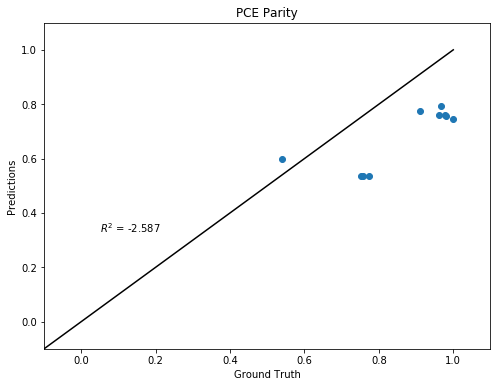

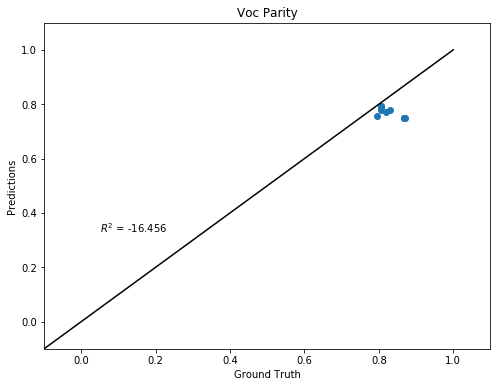

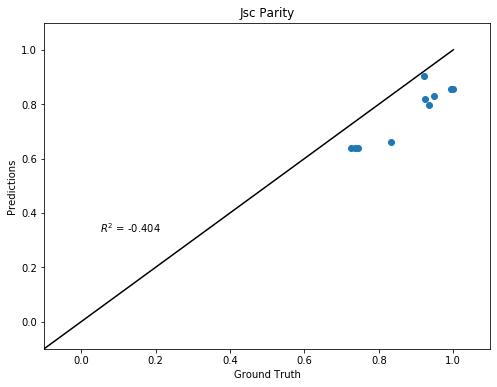

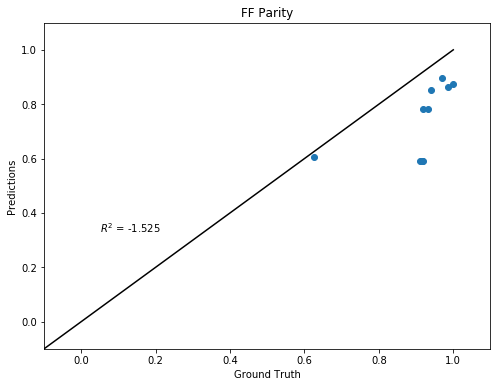

In [18]:
xlin = ylin = np.arange(-2, 2, 1)

r2 = r2_score(pce_preds, y_test['PCE'])
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(y_test['PCE'], pce_preds)
plt.plot(xlin, ylin, c = 'k')
ax.annotate(f"$R^{2}$ = {r2:.3f}", xy = (0.2, 0.4), xycoords = 'figure fraction')
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
ax.set_ylabel("Predictions")
ax.set_xlabel("Ground Truth")
plt.title('PCE Parity')
plt.show()

r2 = r2_score(voc_preds, y_test['VocL'])
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(y_test['VocL'], voc_preds)
plt.plot(xlin, ylin, c = 'k')
ax.annotate(f"$R^{2}$ = {r2:.3f}", xy = (0.2, 0.4), xycoords = 'figure fraction')
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
ax.set_ylabel("Predictions")
ax.set_xlabel("Ground Truth")
plt.title('Voc Parity')
plt.show()

r2 = r2_score(jsc_preds, y_test['Jsc'])
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(y_test['Jsc'], jsc_preds)
plt.plot(xlin, ylin, c = 'k')
ax.annotate(f"$R^{2}$ = {r2:.3f}", xy = (0.2, 0.4), xycoords = 'figure fraction')
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
ax.set_ylabel("Predictions")
ax.set_xlabel("Ground Truth")
plt.title('Jsc Parity')
plt.show()

r2 = r2_score(ff_preds, y_test['FF'])
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(y_test['FF'], ff_preds)
plt.plot(xlin, ylin, c = 'k')
ax.annotate(f"$R^{2}$ = {r2:.3f}", xy = (0.2, 0.4), xycoords = 'figure fraction')
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
ax.set_ylabel("Predictions")
ax.set_xlabel("Ground Truth")
plt.title('FF Parity')
plt.show()

----------------------------------------
# Testing and Development below here

----------------------------------------

In [11]:
svr = SVR(kernel = 'poly', degree = 15, gamma = 'scale', coef0 = 1,
          C = 1e2, verbose = 2)

In [ ]:
svr.fit(dev_only_x, dev_only_y['PCE'])

[LibSVM]

In [9]:
pce_preds = svr.predict(x_test[['Anneal_time', 'Anneal_temp']])

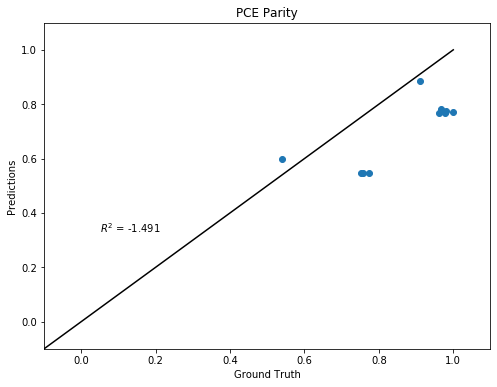

In [10]:
xlin = ylin = np.arange(-2, 2, 1)

r2 = r2_score(pce_preds, y_test['PCE'])
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(y_test['PCE'], pce_preds)
plt.plot(xlin, ylin, c = 'k')
ax.annotate(f"$R^{2}$ = {r2:.3f}", xy = (0.2, 0.4), xycoords = 'figure fraction')
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
ax.set_ylabel("Predictions")
ax.set_xlabel("Ground Truth")
plt.title('PCE Parity')
plt.show()